In [39]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [40]:
# This will create a list of URL to be scraped

my_url = "https://www.nass.usda.gov/Quick_Stats/Ag_Overview/stateOverview.php?state="

states_list=["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","NEW%20HAMPSHIRE","NEW%20MEXICO","New%20York",
  "North%20Carolina","North%20Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "South%20Carolina","South%20Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","WEST%20VIRGINIA","Wisconsin","Wyoming"]

year_list_num= [*range(2000,2021,1)]
years_list= [str(x) for (x) in year_list_num]

# This the list of url
url_list=[]
for state in states_list:
    my_query = my_url + state
    for year in years_list:
        new_url = my_query +'&year=' + year
        url_list.append(new_url)
       

In [42]:
def get_value(url):
    driver.get(url)
    dic={}
    Area_Operated= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[1]/td[2]").text
    Num_of_Operations= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[2]/td[2]").text
    Acres_Operated= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[1]/tbody/tr[3]/td[2]").text
    Cows_Beef= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[1]/td[2]").text
    Cows_Milk = driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[2]/td[2]").text
    Calves= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[2]/tbody/tr[3]/td[2]").text
    Milk_Per_head= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[3]/tbody/tr[1]/td[2]").text
    Milk_production= driver.find_element_by_xpath("/html/body/div/div[3]/div[1]/table[3]/tbody/tr[3]/td[2]").text
    
    dic={'Area_Operated':Area_Operated, 'Num_of_Operations':Num_of_Operations,
            'Acres_Operated':Acres_Operated, 'Cows_for_Milk': Cows_Milk, 'Cows_Beef': Cows_Beef,'Calves':Calves ,'Milk_Per_head':Milk_Per_head,
                 'Total_Milk_production':Milk_production }

    return dic

In [44]:

chromedriver = "C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [45]:
driver = webdriver.Chrome(chromedriver)
# driver.get('https://www.nass.usda.gov/Quick_Stats/Ag_Overview/stateOverview.php?state=iowa&year=2017')

In [46]:
from selenium.common.exceptions import NoSuchElementException

data = []
url_list
for page in url_list:
  try:
    time.sleep(1)
    data.append(get_value(page))
    
  except NoSuchElementException:
    # Just append a None or ""
    data.append(None)

In [47]:
# removing the none values
new_data=[x for x in data if x is not None]

    


In [48]:
#saving the scraped data to a file
df= pd.DataFrame(new_data)
df.to_csv('Milk_production_2')

In [1]:
# reading the data from the local dir
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()
mdf = pd.read_excel('Milk_production_4.xlsx')

In [2]:
# now we read the data of rainfall and temprature
temp_rain = pd.read_excel('temp_rain.xlsx')

In [3]:
#merging the data frames
out = (mdf.merge(temp_rain, left_on='State', right_on='State')
          .reindex(columns=['State', 'Area_Operated', 'Num_of_Operations','Acres_Operated', 'Cows_for_Milk', 'Cows_Beef', 'Calves',
       'Milk_Per_head', 'Total_Milk_production','av_temp', 'av_rain']))


In [7]:
smaller_mdf.head()

,Area_Operated,Num_of_Operations,Acres_Operated,Cows_for_Milk,Calves,Milk_Per_head,Total_Milk_production,av_temp,av_rain
0,191,"47,000","9,000,000","23,000","1,360,000","13,920",348000000,62.8,58.3
1,193,"46,000","8,900,000","20,000","1,370,000","14,286",300000000,62.8,58.3
2,198,"45,000","8,900,000","19,000","1,440,000","13,850","277,000,000",62.8,58.3
3,200,"45,000","9,000,000","18,000","1,360,000","14,000","252,000,000",62.8,58.3
4,202,"44,000","8,900,000","16,000","1,320,000","14,412","245,000,000",62.8,58.3


In [71]:


num = 0
for i in mdf.columns:
   num += mdf[i][mdf[i]==0].count()
num

3

In [5]:
smaller_mdf= out.loc[:, ['Area_Operated','Num_of_Operations','Acres_Operated','Cows_for_Milk','Calves', 'Milk_Per_head', 'Total_Milk_production','av_temp', 'av_rain' ]]

In [6]:
# df = df.apply(pd.to_numeric) # convert all columns of DataFrame
# df['x']=df['x'].str.replace(',','')
c= smaller_mdf.columns
smaller_mdf[c] = smaller_mdf[c].replace(',', '', regex=True)




In [7]:
smaller_mdf= smaller_mdf.apply(pd.to_numeric)

In [8]:
smaller_mdf.corr()

,Area_Operated,Num_of_Operations,Acres_Operated,Cows_for_Milk,Calves,Milk_Per_head,Total_Milk_production,av_temp,av_rain
Area_Operated,1.000000,-0.202786,0.410104,-0.122789,0.091206,0.245124,-0.106793,-0.273800,-0.729451
Num_of_Operations,-0.202786,1.000000,0.704495,0.317480,0.819213,0.041858,0.295043,0.269234,0.027909
Acres_Operated,0.410104,0.704495,1.000000,0.125443,0.866962,0.238781,0.124496,0.044329,-0.451722
Cows_for_Milk,-0.122789,0.317480,0.125443,1.000000,0.329790,0.363843,0.993782,-0.081804,-0.226916
Calves,0.091206,0.819213,0.866962,0.329790,1.000000,0.172348,0.322205,0.149341,-0.273063
Milk_Per_head,0.245124,0.041858,0.238781,0.363843,0.172348,1.000000,0.403145,-0.252588,-0.546551
Total_Milk_production,-0.106793,0.295043,0.124496,0.993782,0.322205,0.403145,1.000000,-0.077922,-0.242334
av_temp,-0.273800,0.269234,0.044329,-0.081804,0.149341,-0.252588,-0.077922,1.000000,0.569554
av_rain,-0.729451,0.027909,-0.451722,-0.226916,-0.273063,-0.546551,-0.242334,0.569554,1.000000


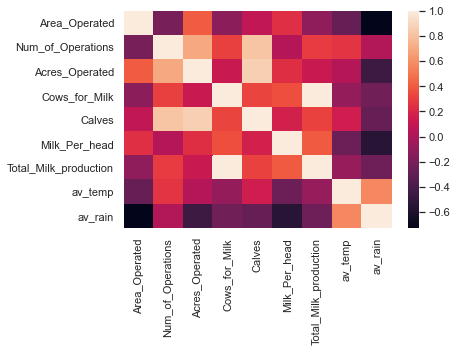

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(smaller_mdf.corr());


In [32]:

m = LinearRegression()
m.fit(smaller_mdf[['Area_Operated','Num_of_Operations','Acres_Operated','Cows_for_Milk','Calves', 'Milk_Per_head','av_temp', 'av_rain']],smaller_mdf['Total_Milk_production'])
m.score(smaller_mdf[['Area_Operated','Num_of_Operations','Acres_Operated','Cows_for_Milk','Calves', 'Milk_Per_head', 'av_temp', 'av_rain']],smaller_mdf['Total_Milk_production'])

0.9905092957839449

### As seen from the above, it is noticeable that multicoluniarty is affecting the model

In [13]:
smaller_mdf.tail(100)

,Area_Operated,Num_of_Operations,Acres_Operated,Cows_for_Milk,Calves,Milk_Per_head,Total_Milk_production,av_temp,av_rain
883,177,47000,8300000,103000,1660000,16990,1784000000,55.1,44.3
884,175,46800,8200000,100000,1620000,17363,1771000000,55.1,44.3
885,171,47400,8100000,98000,1570000,17530,1753000000,55.1,44.3
886,171,46900,8000000,97000,1470000,17612,1726000000,55.1,44.3
887,173,46900,8100000,95000,1550000,18083,1736000000,55.1,44.3
...,...,...,...,...,...,...,...,...,...
978,2442,12000,29300000,6000,1330000,23300,139800000,42.0,12.9
979,2437,11900,29000000,6000,1320000,23033,138200000,42.0,12.9
980,2437,11900,29000000,6000,1300000,23700,142200000,42.0,12.9
981,2417,12000,29000000,6000,1320000,24433,146600000,42.0,12.9


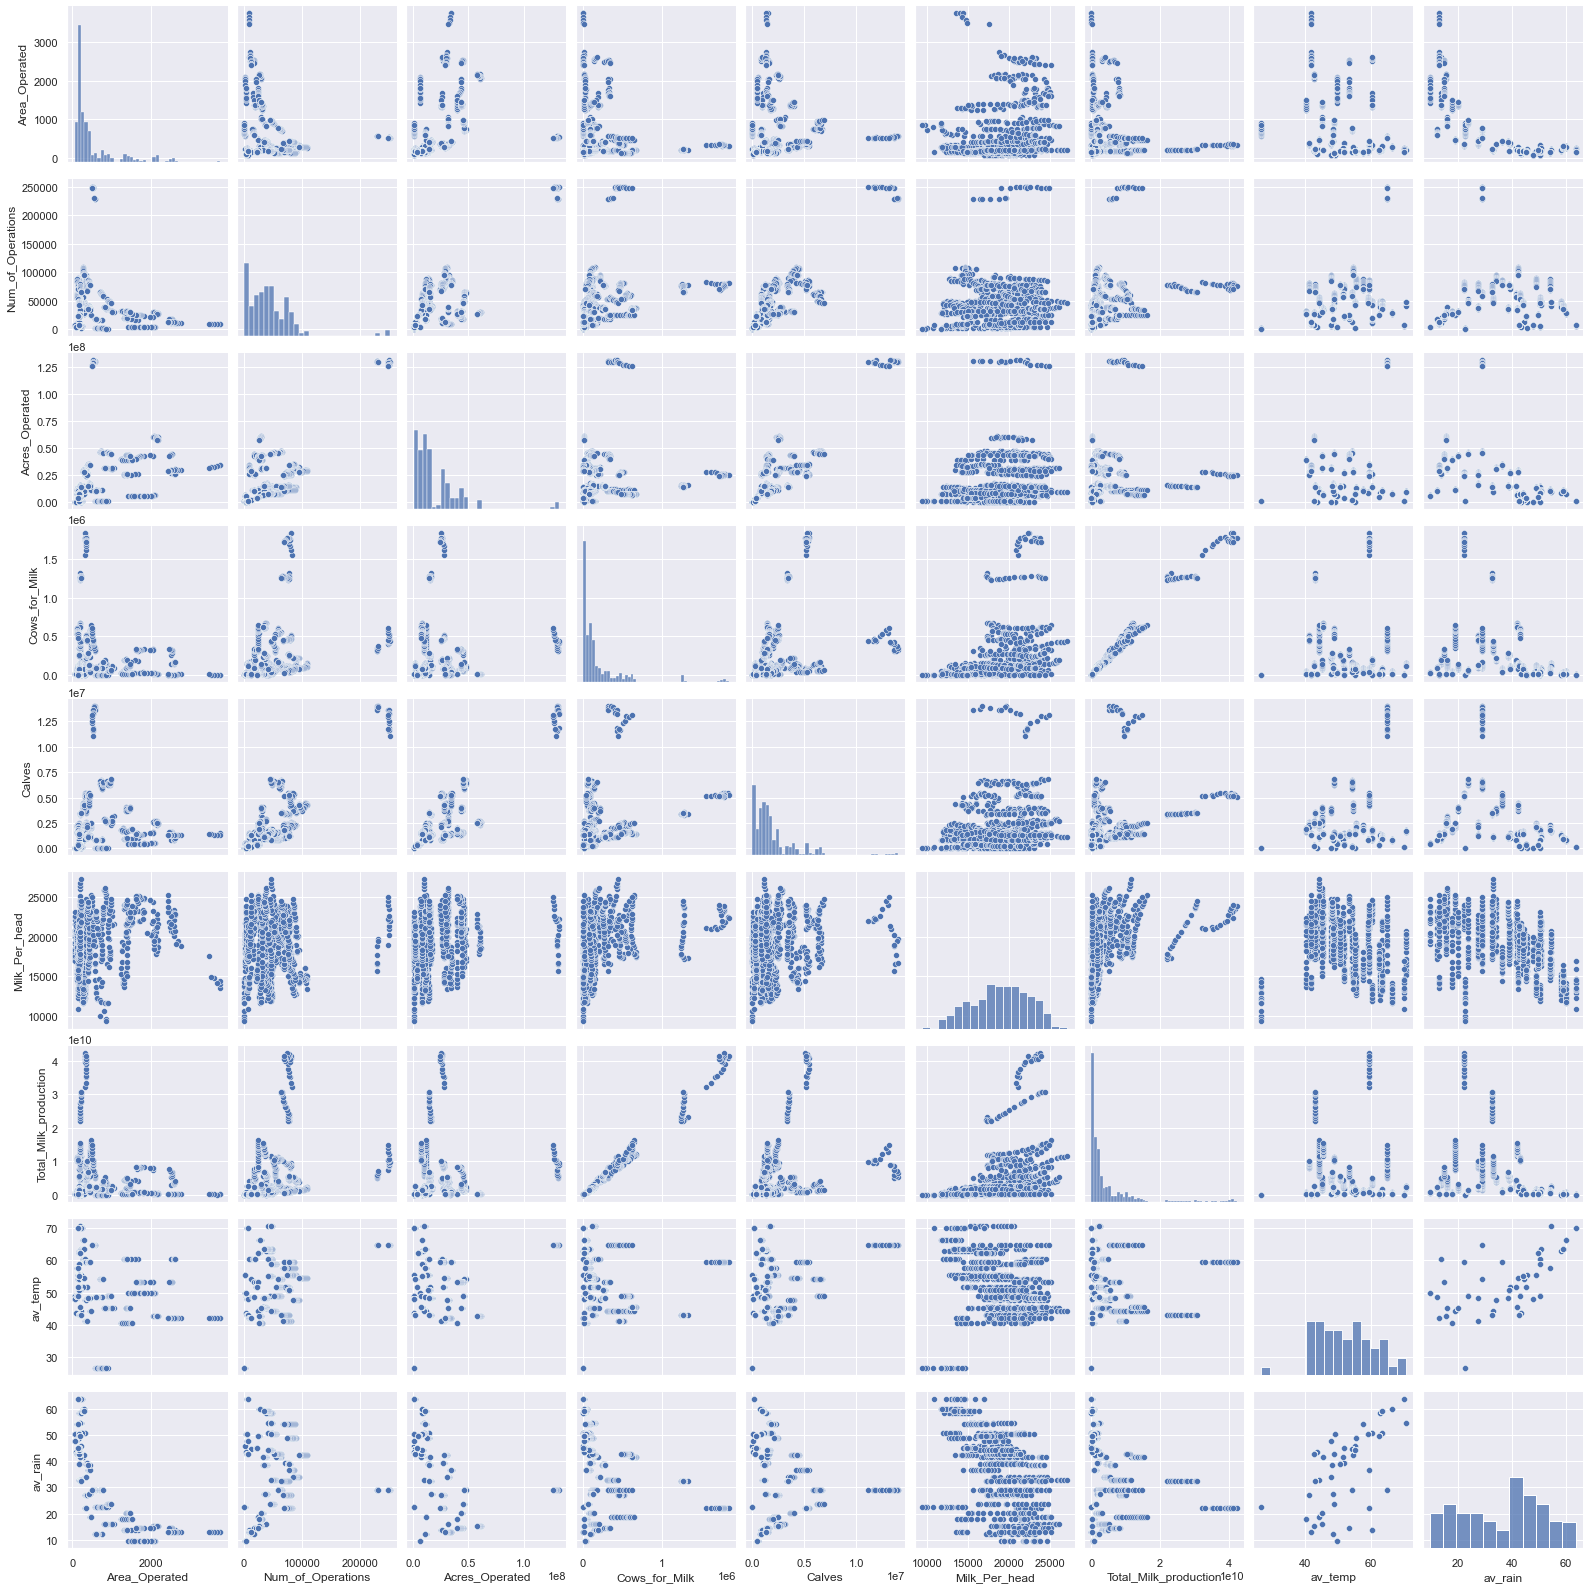

In [14]:
sns.pairplot(smaller_mdf)

In [53]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
%matplotlib inline

# Split into train, val, and test
X, X_test, y, y_test = train_test_split(smaller_mdf[['Area_Operated','Num_of_Operations','Acres_Operated','Calves', 'Milk_Per_head','av_temp', 'av_rain']], 
                                        smaller_mdf['Total_Milk_production'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)



In [54]:


# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)



0.4223412350046538

In [55]:
# Score on validation set
lr.score(X_val,y_val)

0.440762781355185

In [56]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)




0.9069068715011728

In [57]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

0.9339761758065184

In [39]:
lr_poly.coef_



array([ 1.24803837e+04, -2.58342421e+06,  8.60069976e+05, -3.92876524e+02,
        6.13903661e+02,  8.20894831e+05,  1.43706197e+08,  2.43310847e+08,
        1.18959123e+03, -9.82241733e+02, -3.65313216e-01,  6.51200407e+00,
        4.23178616e+02, -3.85299735e+05,  1.14735658e+06, -4.47556264e+00,
        7.46269076e-04,  1.51605864e-01,  4.01604518e+00, -1.46639696e+04,
        7.55833494e+03,  2.57273686e-05, -4.82808033e-04, -3.20609999e-02,
        3.42556074e+01, -2.09525397e+01,  7.00091444e-04,  2.67799158e-01,
        4.68947193e+01, -2.88511804e+02,  1.18506364e+01, -3.83480856e+04,
        2.18547948e+04,  1.56910822e+07, -2.56872296e+07,  8.47933305e+06])

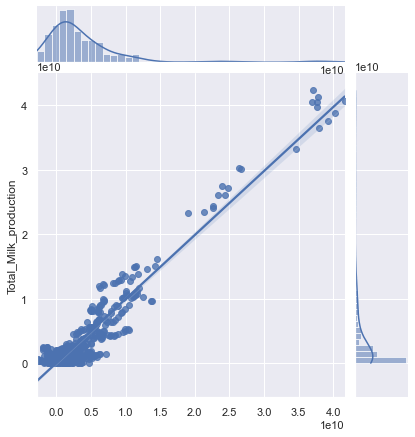

In [61]:
preds= lr_poly.predict(X_train_poly)
sns.jointplot(x=preds,y=y_train, kind='reg')

# Lasso


In [47]:
from sklearn.linear_model import LassoCV, RidgeCV

# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9930290613995438e+18, tolerance: 1.94725178634831e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.730227314371592e+18, tolerance: 1.94725178634831e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4666712122759578e+19, tolerance: 1.94725178634831e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.430443943057687e+19, tolerance: 1.94725178634831e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.558866389004609e+19, tolerance: 1.94725178634831e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.381166698564367e+19, tolerance: 1.94725178634831e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.152366543454811e+19, tolerance: 2.1477030656161444e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4817700511816352e+19, tolerance: 2.1477030656161444e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6978587014847267e+19, tolerance: 2.1477030656161444e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3294371954645533e+19, tolerance: 2.160299346926743e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.143817269672516e+19, tolerance: 2.160299346926743e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0053785504495698e+19, tolerance: 2.160299346926743e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1899507670175973e+19, tolerance: 2.160299346926743e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.826966214664729e+19, tolerance: 2.160299346926743e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.544433822940398e+19, tolerance: 2.160299346926743e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.087369022116725e+18, tolerance: 2.0537511531833562e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.201617966113489e+18, tolerance: 2.0537511531833562e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.261699323174584e+18, tolerance: 2.0537511531833562e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0638390719767118e+19, tolerance: 2.0537511531833562e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.18401407005811e+19, tolerance: 2.0537511531833562e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.412678273809252e+19, tolerance: 2.0537511531833562e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate

0.8799789636620645

In [48]:


# Score on validation set
lasso.score(X_val_poly_scaled, y_val)



0.9077296309142334

In [49]:


list(zip(poly.get_feature_names(['Area_Operated','Num_of_Operations','Acres_Operated','Calves', 'Milk_Per_head','av_temp', 'av_rain']),lasso.coef_))



[('1', 0.0),
 ('Area_Operated', 0.0),
 ('Num_of_Operations', 19568850229.336674),
 ('Acres_Operated', -4960924441.000688),
 ('Calves', 10576103344.16812),
 ('Milk_Per_head', 0.0),
 ('av_temp', 738935976.9203488),
 ('av_rain', 3940073340.5732794),
 ('Area_Operated^2', -4204141675.438963),
 ('Area_Operated Num_of_Operations', -6038833816.587551),
 ('Area_Operated Acres_Operated', 9431317842.84147),
 ('Area_Operated Calves', -10653647965.771513),
 ('Area_Operated Milk_Per_head', 1357836808.3190334),
 ('Area_Operated av_temp', 747654683.6640468),
 ('Area_Operated av_rain', 5619940406.725313),
 ('Num_of_Operations^2', -3178968798.5026035),
 ('Num_of_Operations Acres_Operated', 0.0),
 ('Num_of_Operations Calves', 0.0),
 ('Num_of_Operations Milk_Per_head', 0.0),
 ('Num_of_Operations av_temp', -0.0),
 ('Num_of_Operations av_rain', -7439002547.055271),
 ('Acres_Operated^2', 12544820645.89488),
 ('Acres_Operated Calves', -13051573970.013336),
 ('Acres_Operated Milk_Per_head', -16820754570.766558

In [50]:
# Fit a LASSO model on full dataset using scaled, polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV()
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.105002647958061e+18, tolerance: 3.311953644454985e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.844977445126537e+18, tolerance: 3.311953644454985e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0026947678252827e+19, tolerance: 3.311953644454985e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9920986518799254e+19, tolerance: 3.311953644454985e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.27595837409628e+19, tolerance: 3.311953644454985e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.109916049654819e+20, tolerance: 3.311953644454985e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1576824871396573e+19, tolerance: 3.0135506236230845e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.788209110271394e+18, tolerance: 3.0135506236230845e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.359943321464078e+18, tolerance: 3.0135506236230845e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinat

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.11187497734106e+19, tolerance: 3.149432257491122e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9448455300979884e+19, tolerance: 3.149432257491122e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.846784577514714e+19, tolerance: 3.149432257491122e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.189346187571364e+18, tolerance: 2.822389663990312e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.718027829537407e+18, tolerance: 2.822389663990312e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5104492480312115e+18, tolerance: 2.822389663990312e+18
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\XPS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_d

0.9123118491168124